# Summer Olympics Dataset


This assignment explores the basic use of __Pandas__ and will cover the basic commands of __Exploratory Data Analysis(EDA)__ which includes __cleaning__, __munging__, __combining__, __reshaping__, __slicing__, __dicing__, and __transforming data__ for analysis purpose.

* __Exploratory Data Analysis__ <br/>
Understand the data by EDA and derive simple models with Pandas as baseline.
EDA ia a critical and first step in analyzing the data and we do this for below reasons :
    - Finding patterns in Data
    - Determining relationships in Data
    - Checking of assumptions
    - Preliminary selection of appropriate models
    - Detection of mistakes 

### 2. Data Loading and Description

- The dataset consists of the information about Summer Olympic Games. Various variables present in the dataset includes data of atheletes, sports, events, participatin countries etc. 
- The dataset comprises of __31165 observations of 9 columns__. Below is a table showing names of all the columns and their description.

| Column Name   | Description                                               |
| ------------- |:-------------                                            :| 
| Year          | Olympic Season Year                                       | 
| City          | City where games held                                     |  
| Sport         | Sport category                                            | 
| Discipline    | Name of Sport                                             |   
| Athlete       | Name of Athlete                                           |
| Country       | Athlete's Country                                         |
| Gender        | Sex of Athlete                                            |
| Event         | Name of Event                                             |
| Medal         | Medals                                                    |

# 3. Loading Packages & Dataset

In [9]:
# Importing Libraries 
import numpy as np                                          # Implemennts milti-dimensional array and matrices
import pandas as pd                                         # For data manipulation and analysis
#import pandas_profiling
import matplotlib.pyplot as plt                             # Plotting library for Python programming language and it's numerical mathematics extension NumPy
import seaborn as sns                                       # Provides a high level interface for drawing attractive and informative statistical graphics
%matplotlib inline
sns.set()

In [10]:
olympic = pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/summer%20olympics.csv")

# 4. Data Profiling

In [11]:
olympic.shape

(31165, 9)

In [12]:
olympic.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [5]:
olympic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31165 entries, 0 to 31164
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        31165 non-null  int64 
 1   City        31165 non-null  object
 2   Sport       31165 non-null  object
 3   Discipline  31165 non-null  object
 4   Athlete     31165 non-null  object
 5   Country     31161 non-null  object
 6   Gender      31165 non-null  object
 7   Event       31165 non-null  object
 8   Medal       31165 non-null  object
dtypes: int64(1), object(8)
memory usage: 2.1+ MB


In [6]:
olympic.describe(include='all')

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
count,31165.000000,31165,31165,31165,31165,31161,31165,31165,31165
unique,NaN,22,43,67,22762,147,2,666,3
top,NaN,London,Aquatics,Athletics,"PHELPS, Michael",USA,Men,Football,Gold
freq,NaN,3567,4170,3638,22,4585,22746,1497,10486
mean,1970.482785,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,33.158416,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1896.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1948.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1980.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Pre-Profiling Summary
- __Athlete, Country, Discipline & Event__ has a high cardinality
- Dataset has 2 duplicate rows 
- __Country__ has 4 missing values

In [7]:
# Dropping duplicates
olympic.drop_duplicates(inplace=True)

In [8]:
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data(olympic)

,Total,Percent
Country,4,0.012836
Year,0,0.000000
City,0,0.000000
Sport,0,0.000000
Discipline,0,0.000000
Athlete,0,0.000000
Gender,0,0.000000
Event,0,0.000000
Medal,0,0.000000


# Questions

## 1. How many uniques events (sports) do we have thus far, in Summer Olympics?

In [3]:
# Read in the CSV file
df = pd.read_csv("summer_olympics.csv")

# Get unique events (sports) in Summer Olympics
unique_events = df['Sport'].nunique()

print(f"There are {unique_events} unique events (sports) in Summer Olympics.")


There are 43 unique events (sports) in Summer Olympics.


## 2. Not all of the above unique sports were part of Summer Olympics starting 1896. 
## Find out which year the sport (kind of sport) was inducted into Olympics

In [4]:
when_were_added = df.groupby('Sport')['Year'].min()
print(when_were_added)

Sport
Aquatics             1896
Archery              1900
Athletics            1896
Badminton            1992
Baseball             1992
Basketball           1936
Basque Pelota        1900
Boxing               1904
Canoe                2012
Canoe / Kayak        1936
Cricket              1900
Croquet              1900
Cycling              1896
Equestrian           1900
Fencing              1896
Football             1900
Golf                 1900
Gymnastics           1896
Handball             1936
Hockey               1908
Ice Hockey           1920
Jeu de paume         1908
Judo                 1964
Lacrosse             1904
Modern Pentathlon    1912
Polo                 1900
Rackets              1908
Roque                1904
Rowing               1900
Rugby                1900
Sailing              1900
Shooting             1896
Skating              1908
Softball             1996
Table Tennis         1988
Taekwondo            2000
Tennis               1896
Triathlon            2000
Tug of

## 3. What is the number of Sports held per year in Summer Olypics, since 1896?  
## Draw the barplot diagram

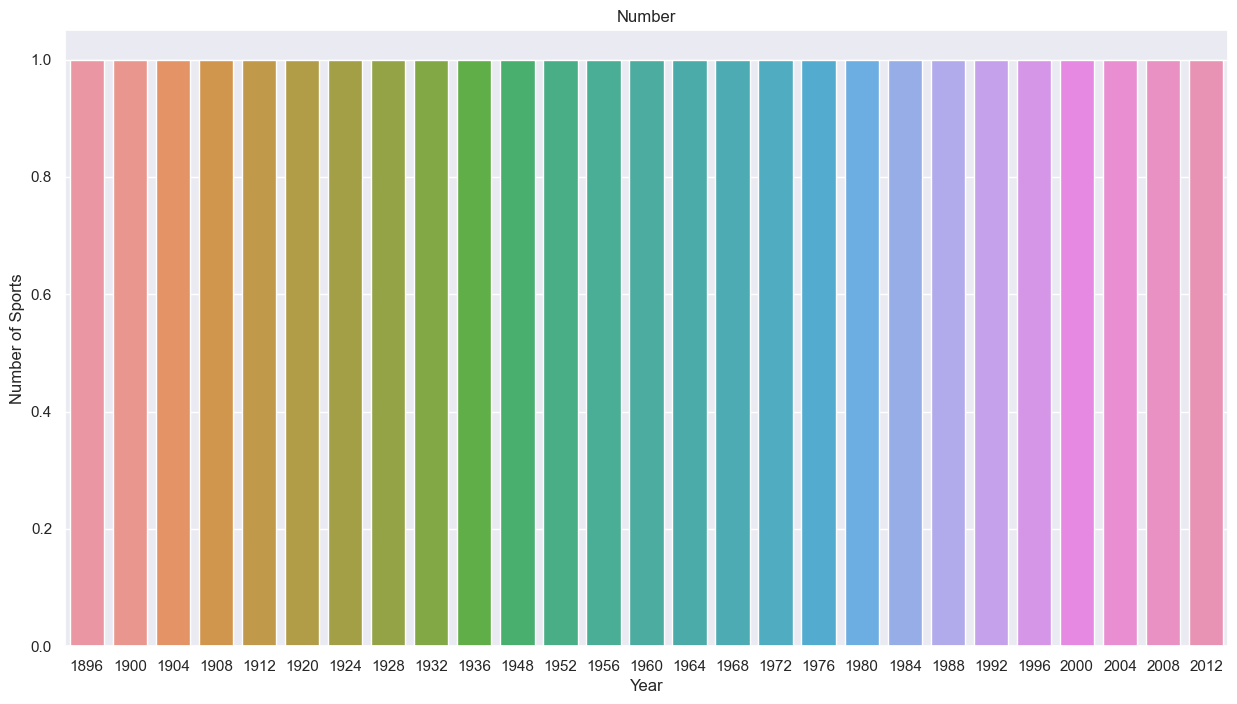

In [36]:
import seaborn as sns       
import matplotlib.pyplot as plt        
sports_per_year = df.groupby(['Year', 'Sport'])['Sport'].nunique()
sports_per_year_df = sports_per_year.to_frame(name='count').reset_index()
sns.set(rc = {'figure.figsize':(15,8)})
sns.barplot(x='Year', y='count', data=sports_per_year_df)
plt.title('Number')
plt.xlabel('Year')
plt.ylabel('Number of Sports')

plt.show()

## 4. How is the gender participation in Summer Olympics, since 1896? (yearly)
## Draw the barplot diagram and pie chart

<AxesSubplot: xlabel='Year', ylabel='count'>

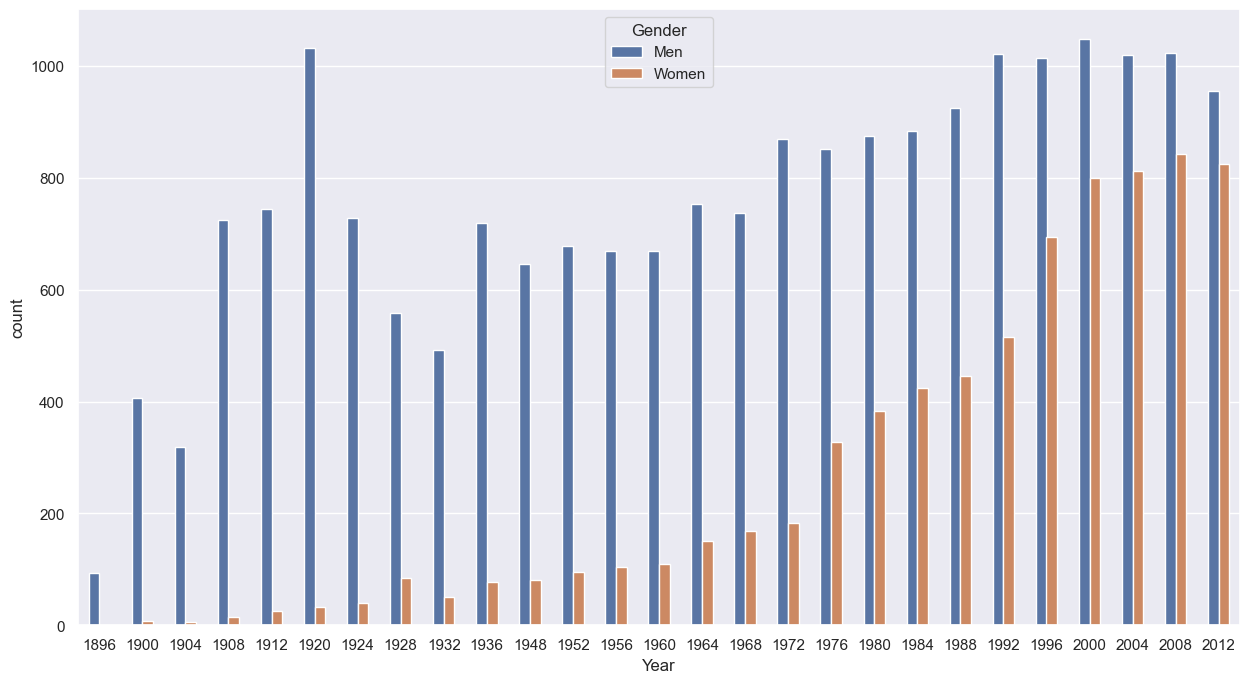

In [50]:
gender_participation = df.groupby(['Year', 'Gender'])['Athlete'].nunique()
gender_participation_df = gender_participation.to_frame(name='count').reset_index()
sns.set(rc = {'figure.figsize':(15,8)})
sns.barplot(x='Year', y='count', hue='Gender', data=gender_participation_df,width=0.5)

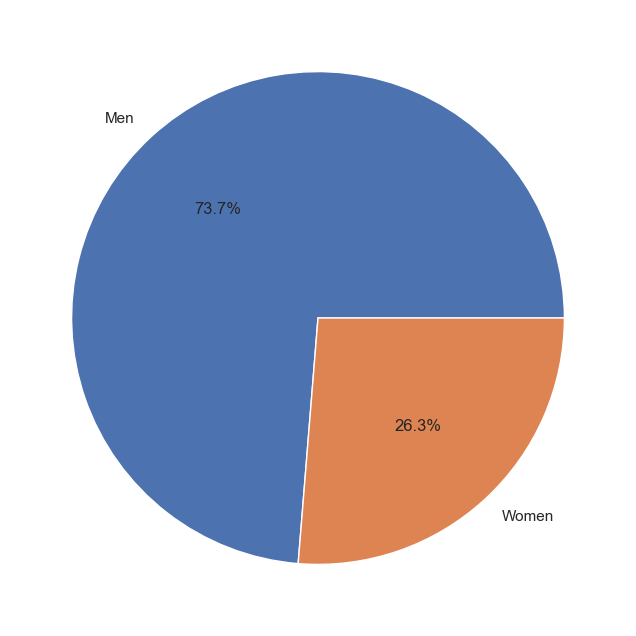

In [49]:
plt.pie(gender_participation_df.groupby('Gender').sum()['count'], labels=gender_participation_df['Gender'].unique(), autopct='%1.1f%%')
plt.show()

## 6. How many cities hosted the Summer Olympics games, since 1896?
### 6.1 How many cities in which Olympics was conducted more than once?

In [92]:
hosted_cities = df['City'].nunique()
hosted_cities_1 = df.groupby('City')['Year'].nunique().reset_index()
hosted_cities_df = hosted_cities_1[hosted_cities_1['Year'] > 1]['City'].tolist()
print(len(hosted_cities_df))

4


In [ ]:
## 7. Which country won the most Gold medals, in each of the Olympics?

## 8. How many medals were won by women in Summer Olympics?

# 9. Top 10 Women Athletes - Gold Medals

# 10. Top 10 Men Athletes - Gold Medals

## 11. Top 5 countries to win most Gold medals across all seasons collectively

## Draw the barplot

## 13. Evolution of the Olympics over time

13.1. How the number of athletes/countries varied along time ? \
13.2. How the proportion of Men/Women varied with time ?

## 14. How many athlete participated in each sport in Summer Olympics?

## 15. How many athlete participate in each Summer Olympic?

## 18. Number of events in each sport over years [Heatmap]

: 

__Athletics__ and __Aquatics__ are the sports which has the maximum number of events